In [1]:
using DataFrames, CSV
using Plots, StatsPlots, Statistics

┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190


In [2]:
interactions = CSV.read("data/Magrach2017_network.csv")
first(interactions, 5)

,country,year,site_id,landscape_type,transect,period,round,date,temperature
,String,Int64,String,String,Int64,String,String,String,String
1,Spain,2011,Barca,high,1,after,3,5/5/11,26
2,Spain,2011,Barca,high,1,after,3,5/5/11,26
3,Spain,2011,Barca,high,1,after,3,5/5/11,26
4,Spain,2011,Barca,high,1,after,3,5/5/11,26
5,Spain,2011,Barca,high,1,after,3,5/5/11,26


In [3]:
names(interactions)

23-element Array{Symbol,1}:
 :country                      
 :year                         
 :site_id                      
 :landscape_type               
 :transect                     
 :period                       
 :round                        
 :date                         
 :temperature                  
 :starting_time                
 :interval_in_transect         
 :pollinator_group             
 :pollinator_genus             
 :pollinator_species           
 Symbol("pollinator_species.1")
 :morpho_descriptions          
 :collected                    
 :plant_genus                  
 :plant_species                
 :Gen_sp                       
 :Plant_sp                     
 :longitude                    
 :latitude                     

In [4]:
sites = unique(interactions.site_id)

17-element Array{String,1}:
 "Barca"      
 "Bonares"    
 "Cartaya"    
 "Cetrero"    
 "Curva"      
 "Estanque"   
 "Gibraleon"  
 "Gravera"    
 "Lucena"     
 "Menajo"     
 "Niebla"     
 "Pinar"      
 "Redondela"  
 "Rociana"    
 "Villablanca"
 "Viso"       
 "Canal"      

In [5]:
pollinators = unique(interactions.pollinator_species);
plants = unique(interactions.plant_species);

make_inverse_index = l -> Dict(n => i for (i, n) in enumerate(l))

pollinators_inv_index = make_inverse_index(pollinators);
plants_inv_index = make_inverse_index(plants);

In [6]:
println("Plants:")
for p in plants
    println("- $p")
end

Plants:
- crispus
- foetidum
- tomentosa
- picardii
- montana
- stoechas
- salvifolius
- hirsuta
- sp
- longirostris
- oleraceus/asper
- ragusina
- NA
- libanotis
- foetidum/villosa
- halimifolium
- viscosa
- suber
- coccifera
- canescens
- ladanifer
- scoparius
- calycinum
- sp_pink
- ramosus/aestivus
- officinalis
- integrifolia
- villosa
- barbata
- (integrifolia)
- monspeliensis
- plantagineum
- lutea/sativa
- purpurea
- calcitrapae
- monogyna
- pes-caprae
- triacanthos
- coronopus
- althaeoides
- illyricus
- fruticans
- guttata
- rapunculus
- capilaris
- odora
- lusitanica
- erithraea
- albidus
- columbaria
- rara
- tomentosus
- ladanifer_leaves
- sphaerocarpa
- ilex
- longirrostris
- lanceolata
- albidus&crispus
- lentiscus


In [7]:
println("Pollinators:")
for p in pollinators
    println("- $p")
end

Pollinators:
- mellifera
- nigroaenea_nigrosericea
- venustus
- scripta
- elongata
- arbustorum
- vespiforme
- sp_large
- bimaculata
- cyanea
- mlokossewiczi
- ligurica
- cucurbitina
- notata
- villipes 
- albocinctum
- sticticum
- flavipes
- sp
- collaris
- chalybea
- ovatula
- angustior_impressa
- hispaliensis
- aurulenta
- sp_2
- cingulata
- banksianus
- dargius
- rhyssonota_flava
- alternans
- calcaratus_lagopus
- sp_1
- septemdentatum
- leucozonium
- sp_dark_thin
- cantabrita
- immunitum
- hispania
- benoisti
- immunitum-type
- papaveris
- foveolaris
- setosus
- subauratus
- mediterraneum
- malachurum
- malachurum/mediterraneum
- sp_Eristalis-alike
- signata
- mocsaryi
- tenax
- perezi
- discum
- balteatus
- fulvipes
- dargius/cephalotes
- pollinosus
- notata 
- sp_immunitum-alike
- manicatum
- sp_brown
- sp_collaris-alike
- sp_medium_wide_black&yellow
- humilis
- villosulum
- latifrons
- pipiens
- florea
- leucoleucozonium/immunitum
- atroalba
- sp_white
- rufa
- sp_medium
- latr

In [8]:
function make_incidence(interactions, pl_inv_index, pol_inv_index)
    Y = zeros(length(pl_inv_index), length(pol_inv_index))
    for (pl, pol, int) in zip(interactions[:plant_species], interactions[:pollinator_species], interactions[:transect])
        i, j = pl_inv_index[pl], pol_inv_index[pol]
        Y[i,j] += int
    end
    return Y
end

make_incidence (generic function with 1 method)

In [9]:
Y = make_incidence(interactions, plants_inv_index, pollinators_inv_index)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = make_incidence(::DataFrame, ::Dict{String,Int64}, ::Dict{String,Int64}) at In[8]:3
└ @ Main ./In[8]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = make_incidence(::DataFrame, ::Dict{String,Int64}, ::Dict{String,Int64}) at In[8]:3
└ @ Main ./In[8]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = make_incidence(::DataFrame, ::Dict{String,Int64}, ::Dict{String,Int64}) at In[8]:3
└ @ Main ./In[8]:3


59×219 Array{Float64,2}:
 4573.0  81.0  1365.0  10.0  3.0   0.0  …  0.0  0.0  0.0  0.0  0.0  2.0  0.0
   18.0  16.0     0.0   6.0  0.0  34.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  419.0   0.0     0.0   0.0  2.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
    0.0   0.0     0.0   0.0  0.0   2.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
    9.0   2.0     0.0   6.0  0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2516.0   4.0     0.0   0.0  0.0   0.0  …  0.0  1.0  1.0  2.0  0.0  0.0  0.0
  709.0   0.0     0.0   5.0  0.0  27.0     0.0  0.0  0.0  0.0  0.0  2.0  2.0
  429.0   0.0     0.0   5.0  0.0   0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
    0.0   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
    1.0   0.0     0.0   4.0  2.0   1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
    1.0   0.0     0.0   0.0  1.0   0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    0.0   0.0     2.0   0.0  1.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
    0.0   0.0     0.0   0.0  0.0   0.0     0.0  0.0

In [10]:
networks_after = Dict{String, Array{Float64,2}}()
networks_during = Dict{String, Array{Float64,2}}()


for site in interactions.site_id
    interactions_site = interactions[interactions.site_id.==site,:]
    Y_after = make_incidence(interactions_site[interactions_site.period.=="after",:],
                            plants_inv_index, pollinators_inv_index)
    Y_during = make_incidence(interactions_site[interactions_site.period.=="during",:],
                            plants_inv_index, pollinators_inv_index)
    
    networks_after[site] = Y_after
    networks_during[site] = Y_during
end

In [11]:
for (time, networks) in zip(["after", "during"], [networks_after, networks_during])
    println("$time")
    for (site, Y) in networks
        println("\t- $site: $(sum(Y)) ($(sum(Y.>0)))")
    end
end

after
	- Estanque: 434.0 (26)
	- Gravera: 459.0 (26)
	- Villablanca: 305.0 (31)
	- Redondela: 382.0 (51)
	- Bonares: 115.0 (38)
	- Canal: 372.0 (18)
	- Curva: 301.0 (28)
	- Niebla: 192.0 (52)
	- Gibraleon: 277.0 (59)
	- Cetrero: 881.0 (64)
	- Pinar: 863.0 (50)
	- Menajo: 1820.0 (32)
	- Viso: 402.0 (45)
	- Barca: 1608.0 (41)
	- Lucena: 171.0 (49)
	- Cartaya: 526.0 (37)
	- Rociana: 54.0 (19)
during
	- Estanque: 340.0 (28)
	- Gravera: 163.0 (25)
	- Villablanca: 346.0 (34)
	- Redondela: 326.0 (26)
	- Bonares: 295.0 (34)
	- Canal: 130.0 (26)
	- Curva: 153.0 (35)
	- Niebla: 173.0 (46)
	- Gibraleon: 327.0 (47)
	- Cetrero: 519.0 (67)
	- Pinar: 559.0 (48)
	- Menajo: 292.0 (24)
	- Viso: 284.0 (44)
	- Barca: 456.0 (56)
	- Lucena: 659.0 (55)
	- Cartaya: 583.0 (42)
	- Rociana: 55.0 (13)


In [12]:
using OTSIN

┌ Info: Recompiling stale cache file /Users/michielstock/.julia/compiled/v1.0/OTSIN/GYaVa.ji for OTSIN [7b885788-be81-11e9-3333-a562fe72c8d6]
└ @ Base loading.jl:1190


Transform the observed interaction matrices in probability matrices. Add small pseudocount $\alpha$ for numerical purposes.

In [13]:
Ps = [(Y .+ 1e-2) |> OTSIN.normalize for Y in values(networks_after)];

We fit a global utility matrix, based on the different assumptions which distributions are fixed. This is done using the observed interactions after the honeybee spillover.

In [21]:
@time M_ab = fitM(Ps, fix_a=true, fix_b=true, maxitter=10);

6965.537256 seconds (23.70 G allocations: 896.382 GiB, 71.75% gc time)


In [22]:
@time M_a = fitM(Ps, fix_a=true, fix_b=false);

 88.586195 seconds (177.06 M allocations: 10.147 GiB, 8.65% gc time)


In [14]:
@time M_b = fitM(Ps, fix_a=false, fix_b=true);

118.711213 seconds (253.59 M allocations: 14.579 GiB, 6.94% gc time)


In [23]:
@time M = fitM(Ps, fix_a=false, fix_b=false);

 96.374655 seconds (181.48 M allocations: 10.087 GiB, 6.96% gc time)


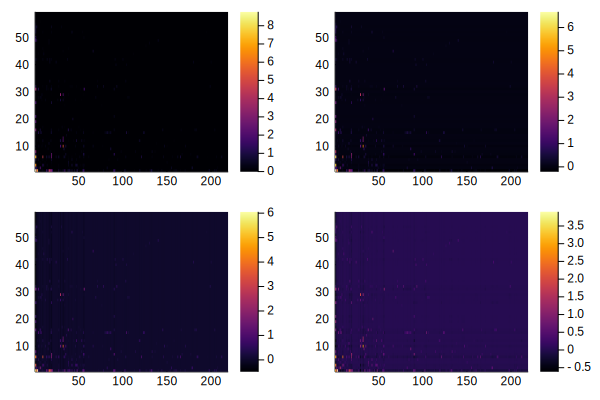

In [24]:
plot(heatmap(M), heatmap(M_a),
        heatmap(M_b), heatmap(M_ab))

In [25]:
Ps_during = [(Y .+ 1e-2) |> OTSIN.normalize for Y in values(networks_during)];

In [26]:
kl_ot_ab = Float64[]
kl_ot_a = Float64[]
kl_ot_b = Float64[]
kl_ot_softmax = Float64[]
kl_ot_neutral = Float64[]

for P in Ps_during
    a, b = marginals(P)
    # optimal transport both
    Q = optimaltransport(M_ab, a, b)
    push!(kl_ot_ab, KL(P, Q))
    Q .= optimaltransport(M_ab, a, nothing)
    push!(kl_ot_a, KL(P, Q))
    Q .= optimaltransport(M_ab, nothing, b)
    push!(kl_ot_b, KL(P, Q))
    Q .= optimaltransport(M_ab, nothing, nothing)
    push!(kl_ot_softmax, KL(P, Q))
    Q .= optimaltransport(a, b)
    push!(kl_ot_neutral, KL(P, Q))
end


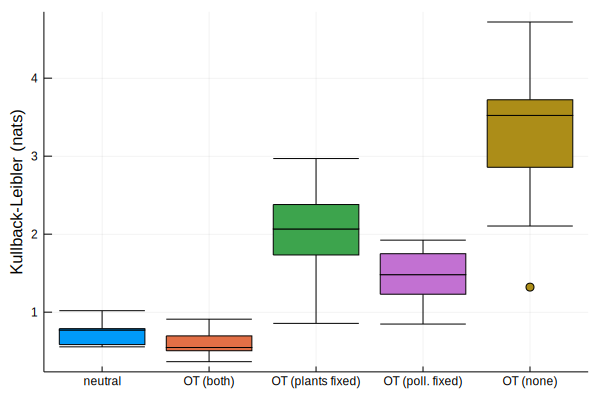

In [41]:
p_mut = boxplot(kl_ot_neutral, label="neutral", legend=:none)
boxplot!(kl_ot_ab, label="OT (both)")
boxplot!(kl_ot_a, label="OT (plants fixed)")
boxplot!(kl_ot_b, label="OT (poll. fixed)")
boxplot!(kl_ot_softmax, label="OT (none)")
ylabel!("Kullback-Leibler (nats)")
xticks!(1:5, ["neutral", "OT (both)", "OT (plants fixed)", "OT (poll. fixed)", "OT (none)"])

In [42]:
savefig(p_mut, "figures/mutnetwork.svg")

In [28]:
Δkl = kl_ot_neutral - kl_ot_ab

17-element Array{Float64,1}:
  0.20875953273407521 
  0.1428562911482345  
  0.2860626189449249  
  0.07019436369324783 
  0.22780884267398882 
  0.20196710584266686 
  0.17957050759033244 
  0.10881973732015915 
  0.07015010058163984 
 -0.011944185925092832
  0.04817658426336813 
  0.40169833251384635 
 -0.02750235444158644 
  0.17871783968572874 
  0.0630544440376184  
  0.008535186241804382
  0.11458465460970757 

In [29]:
mean(Δkl) / (std(Δkl) / √(length(Δkl)))

4.895532635126601